# Analysis Itroduction

In [5]:
import pandas as pd

ratings = pd.read_csv("ratings.csv")
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [6]:
ratings.shape

(100836, 4)

In [7]:
# a panda's documentation called 'dataframe'

ratings.columns = ["user", "movie", "rating", "time"] 
ratings.head()

,user,movie,rating,time
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


# Data Visualization

In [8]:
# a pand's documentation called 'series'

ratings.rating.unique() 



array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

In [9]:
ratings.rating.value_counts()

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: rating, dtype: int64

In [10]:
print(ratings.rating.mean())
print(ratings.rating.median())

3.501556983616962
3.5


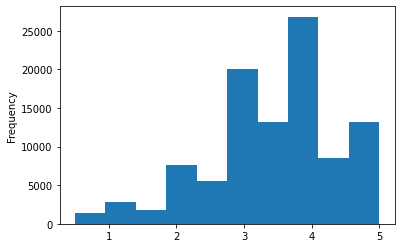

In [11]:
ratings.rating.plot(kind='hist') #visual form of 'value_counts' function

In [12]:
ratings.rating.describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: rating, dtype: float64

In [13]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


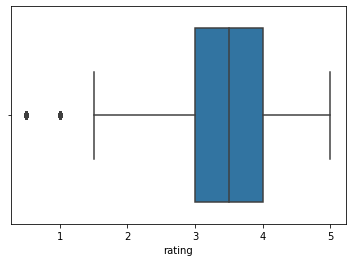

In [14]:
sns.boxplot(ratings.rating) # visual form of 'describe' function

In [15]:
movies = pd.read_csv("movies.csv")
movies.columns = ["movie", "name", "genres"]
movies.head()

,movie,name,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


# Analysing specific ratings


In [16]:
ratings.query("movie == 1").rating.mean()

3.9209302325581397

In [17]:
#grouping things by a reference using 'grouby'
mean_rating = ratings.groupby("movie").mean().rating
mean_rating.head()

movie
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: rating, dtype: float64

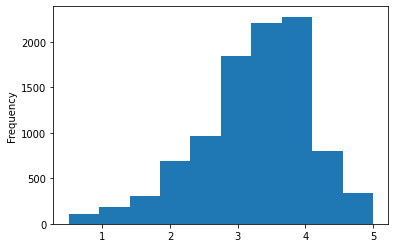

In [18]:
mean_rating.plot(kind = "hist")


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


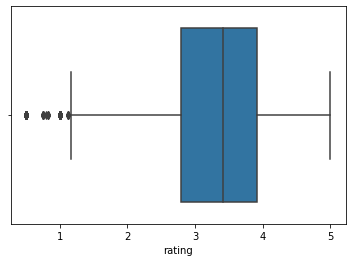

In [19]:
sns.boxplot(mean_rating)

In [20]:
mean_rating.describe()

count    9724.000000
mean        3.262448
std         0.869874
min         0.500000
25%         2.800000
50%         3.416667
75%         3.911765
max         5.000000
Name: rating, dtype: float64

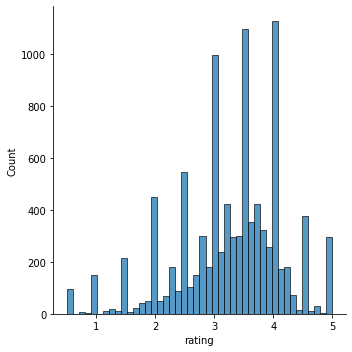

In [21]:
sns.displot(mean_rating)

Text(0.5, 1.0, 'Mean Rating')

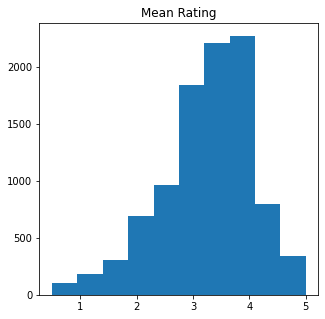

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=[5,5])
plt.hist(mean_rating)
plt.title("Mean Rating")


#Analysing tmdb DataSet

In [23]:
tmdb = pd.read_csv("tmdb_5000_movies.csv")
tmdb.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [24]:
tmdb.original_language.unique() #categorica nominal

array(['en', 'ja', 'fr', 'zh', 'es', 'de', 'hi', 'ru', 'ko', 'te', 'cn',
       'it', 'nl', 'ta', 'sv', 'th', 'da', 'xx', 'hu', 'cs', 'pt', 'is',
       'tr', 'nb', 'af', 'pl', 'he', 'ar', 'vi', 'ky', 'id', 'ro', 'fa',
       'no', 'sl', 'ps', 'el'], dtype=object)

In [25]:
# primeiro grau
# segundo grau
# terceiro grau
# primeiro < segundo < terceiro
# categorico ordinal

In [26]:
# budget -> quantitativo continuo

In [27]:
# number of votes -> quantitativo não continuo

#Graphic visualization per category

In [28]:
language_count = tmdb.original_language.value_counts().to_frame().reset_index()
language_count.columns = ["language", "total"]
language_count.head()

,language,total
0,en,4505
1,fr,70
2,es,32
3,zh,27
4,de,27


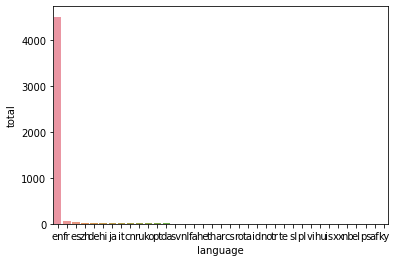

In [29]:
#Bars Graphic
sns.barplot(x="language", y="total", data = language_count)

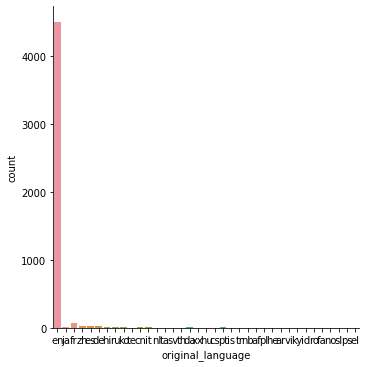

In [30]:
sns.catplot(x = "original_language", kind = "count", data = tmdb)

([<matplotlib.patches.Wedge at 0x7f5e6bc6ab90>,
 [Text(-1.0791697536499925, 0.2130554923183512, 'en'),
  Text(1.0355355017029462, -0.3710339940124459, 'fr'),
  Text(1.0579676486019882, -0.3011718023181785, 'es'),
  Text(1.0687996606645356, -0.26012936274741094, 'zh'),
  Text(1.0773191105706255, -0.22222406260195313, 'de'),
  Text(1.0835167978583342, -0.18971386021801853, 'hi'),
  Text(1.0875756432724297, -0.16486121484618815, 'ja'),
  Text(1.0906010773146022, -0.14348968659882622, 'it'),
  Text(1.092883487371409, -0.12492270822755745, 'cn'),
  Text(1.0946390911069936, -0.10846778425161549, 'ru'),
  Text(1.0960865535188649, -0.09270527058984593, 'ko'),
  Text(1.0972054830031333, -0.07835896928789601, 'pt'),
  Text(1.097965443340663, -0.06687215586282344, 'da'),
  Text(1.0984565010300316, -0.05825217030171998, 'sv'),
  Text(1.0987803851616647, -0.0517847968421653, 'nl'),
  Text(1.0990363161210686, -0.04603450713357274, 'fa'),
  Text(1.0992355702663055, -0.04100196411527794, 'he'),
  Text

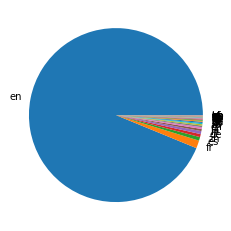

In [31]:
#Pie Graphic - delicado e não aconselhado para grande maioria das situações
plt.pie(language_count.total, labels = language_count.language)

#Exploring the Message beyond the data

In [32]:
total_per_language = tmdb.original_language.value_counts()
total_others = total_per_language.sum()
en_total = total_per_language.loc["en"]
total_others = total_others - en_total
print(en_total, total_others)

4505 298


In [33]:
data = {
    'language' : ['en', 'others'],
    'total' : [en_total, total_others]
}
data

{'language': ['en', 'others'], 'total': [4505, 298]}

In [34]:
data = pd.DataFrame(data)
data

,language,total
0,en,4505
1,others,298


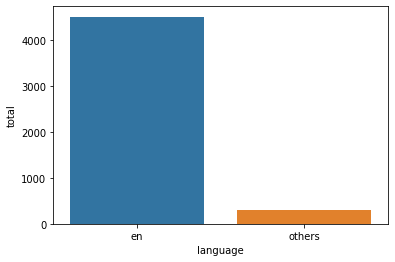

In [35]:
sns.barplot(x='language', y='total', data = data)

([<matplotlib.patches.Wedge at 0x7f5e6bb37510>,
 [Text(-1.0791697536499925, 0.2130554923183512, 'en'),
  Text(1.0791697511565306, -0.2130555049482467, 'others')])

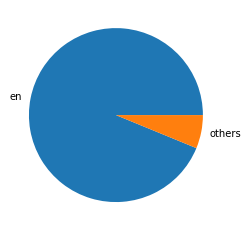

In [36]:
plt.pie(data.total, labels = data.language)

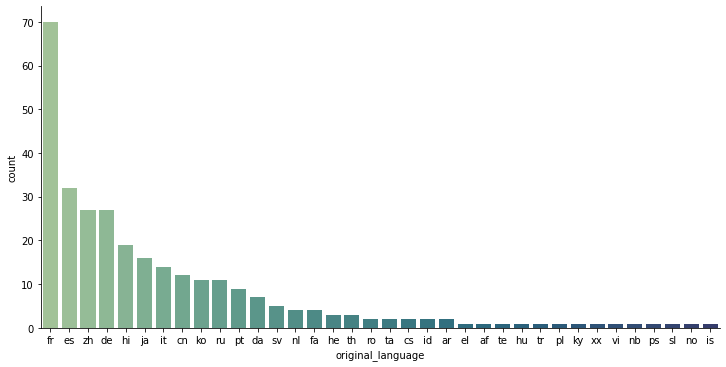

In [50]:
other_languages_total = tmdb.query("original_language != 'en'")
other_languages = tmdb.query("original_language != 'en'").original_language.value_counts()

#plt.figure(figsize=(5,10))

sns.catplot(x="original_language", kind="count", data = other_languages_total,
            aspect = 2,
            palette = "crest",
            order = other_languages.index,)

#Comparing

In [52]:
movies.head(2)

,movie,name,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy


In [57]:
toy_story = ratings.query("movie == 1")
jumanji = ratings.query("movie == 2")
print(len(toy_story), len(jumanji))

215 110


In [59]:
print(toy_story.rating.mean())
print(jumanji.rating.mean())

3.9209302325581397
3.4318181818181817


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


{'boxes': [<matplotlib.lines.Line2D at 0x7f5e6280d8d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f5e62811990>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f5e6279a9d0>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f5e6279a490>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7f5e6280ded0>,
  <matplotlib.lines.Line2D at 0x7f5e627a29d0>]}

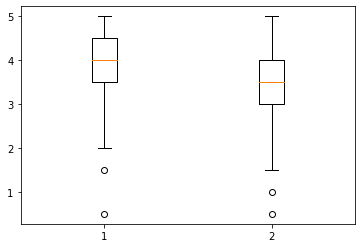

In [66]:
plt.boxplot([toy_story.rating, jumanji.rating])

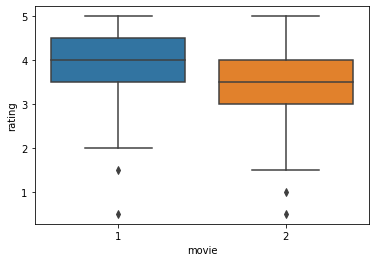

In [68]:
sns.boxplot(x="movie", y="rating", data = ratings.query("movie in [1,2]"))

In [70]:
print(toy_story.rating.std(),jumanji.rating.std())

0.8348591407114045 0.8817134921476455


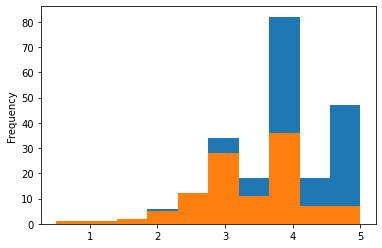

In [73]:
toy_story.rating.plot(kind='hist')
jumanji.rating.plot(kind='hist')